<a href="https://colab.research.google.com/github/starcell/sejong-ml/blob/main/mnist-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# Check if CUDA is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Hyperparameters
batch_size = 64
learning_rate = 0.01
epochs = 10

In [5]:
# MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5644135.34it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 166664.18it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1597001.07it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3126112.37it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
# Define a simple CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net().to(device)

In [8]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
# Training function
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        
        loss = criterion(output, target)
        loss.backward()
        
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] Loss: {loss.item():.6f}')

In [10]:
# Testing function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            
            test_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset)

    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy * 100:.0f}%)\n')

In [11]:
# Run training and testing loops
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

/opt/conda/lib/python3.11/site-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 1 [0/60000] Loss: 2.305544
Train Epoch: 1 [6400/60000] Loss: 0.545265
Train Epoch: 1 [12800/60000] Loss: 0.431535
Train Epoch: 1 [19200/60000] Loss: 0.206359
Train Epoch: 1 [25600/60000] Loss: 0.530055
Train Epoch: 1 [32000/60000] Loss: 0.480695
Train Epoch: 1 [38400/60000] Loss: 0.154401
Train Epoch: 1 [44800/60000] Loss: 0.328694
Train Epoch: 1 [51200/60000] Loss: 0.160593
Train Epoch: 1 [57600/60000] Loss: 0.506362

Test set: Average loss: 0.0013, Accuracy: 9747/10000 (97%)

Train Epoch: 2 [0/60000] Loss: 0.226884
Train Epoch: 2 [6400/60000] Loss: 0.192421
Train Epoch: 2 [12800/60000] Loss: 0.166387
Train Epoch: 2 [19200/60000] Loss: 0.257969
Train Epoch: 2 [25600/60000] Loss: 0.257899
Train Epoch: 2 [32000/60000] Loss: 0.202125
Train Epoch: 2 [38400/60000] Loss: 0.158675
Train Epoch: 2 [44800/60000] Loss: 0.155166
Train Epoch: 2 [51200/60000] Loss: 0.275503
Train Epoch: 2 [57600/60000] Loss: 0.178599

Test set: Average loss: 0.0012, Accuracy: 9760/10000 (98%)

Train Ep

확인

In [13]:
import random
import matplotlib.pyplot as plt

In [19]:
# Get a random sample from the test set
index = random.randint(0, len(test_dataset) - 1)
sample_data, sample_target = test_dataset[index]
sample_data = sample_data.to(device)

In [20]:
# Make prediction
with torch.no_grad():
    output = model(sample_data.unsqueeze(0))  # Add batch dimension
    prediction = output.argmax(dim=1).item()

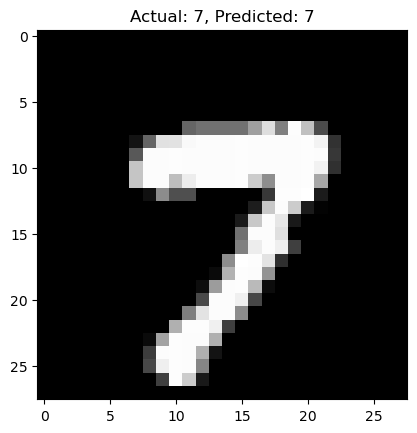

In [21]:
# Display the result
plt.imshow(sample_data.cpu().numpy().squeeze(), cmap='gray')
plt.title(f'Actual: {sample_target}, Predicted: {prediction}')
plt.show()